## 1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

It is much more likely to roll sevens than snake eyes.  Out of the 36 possible outcomes for rolling two dice, only one of them results in snake eyes.  There are 6 outcomes that give sevens (1, 6; 2, 5; 3, 4; 4, 3; 5, 2; 6, 1).  This means the ratio of probabilities is 1:6.

## 2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

**Analytically:**  
  
x | Probability | Combinations  
-- | -- | --  
2 | 1/36 | (1,1)  
3 | 1/18 | (1,2) ; (2,1)  
4 | 1/12 | (1,3) ; (2,2) ; (3,1)  
5 | 1/9 | (1,4) ; (2,3) ; (3,2) ; (4,1)  
6 | 5/36 | (1,5) ; (2,4) ; (3,3) ; (4,2) ; (5,1)  
7 | 1/6 | (1,6) ; (2,5) ; (3,4) ; (4,3) ; (5,2) ; (6,1)  
8 | 5/36 | (2,6) ; (3,5) ; (4,4) ; (5,3) ; (6,2)  
9 | 1/9 | (3,6) ; (4,5) ; (5,4) ; (6,3)  
10 | 1/12 | (4,6) ; (5,5) ; (6,4)
11 | 1/18 | (5,6) ; (6,5)  
12 | 1/36 | (6,6)  

  
From class:  
    $P_{A+B}(x) = \sum_z (P_A(z)*P_B(x-z))$  
    

[0.027556 0.055112 0.082668 0.110224 0.13778  0.165336 0.13778  0.110224
 0.082668 0.055112 0.027556]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


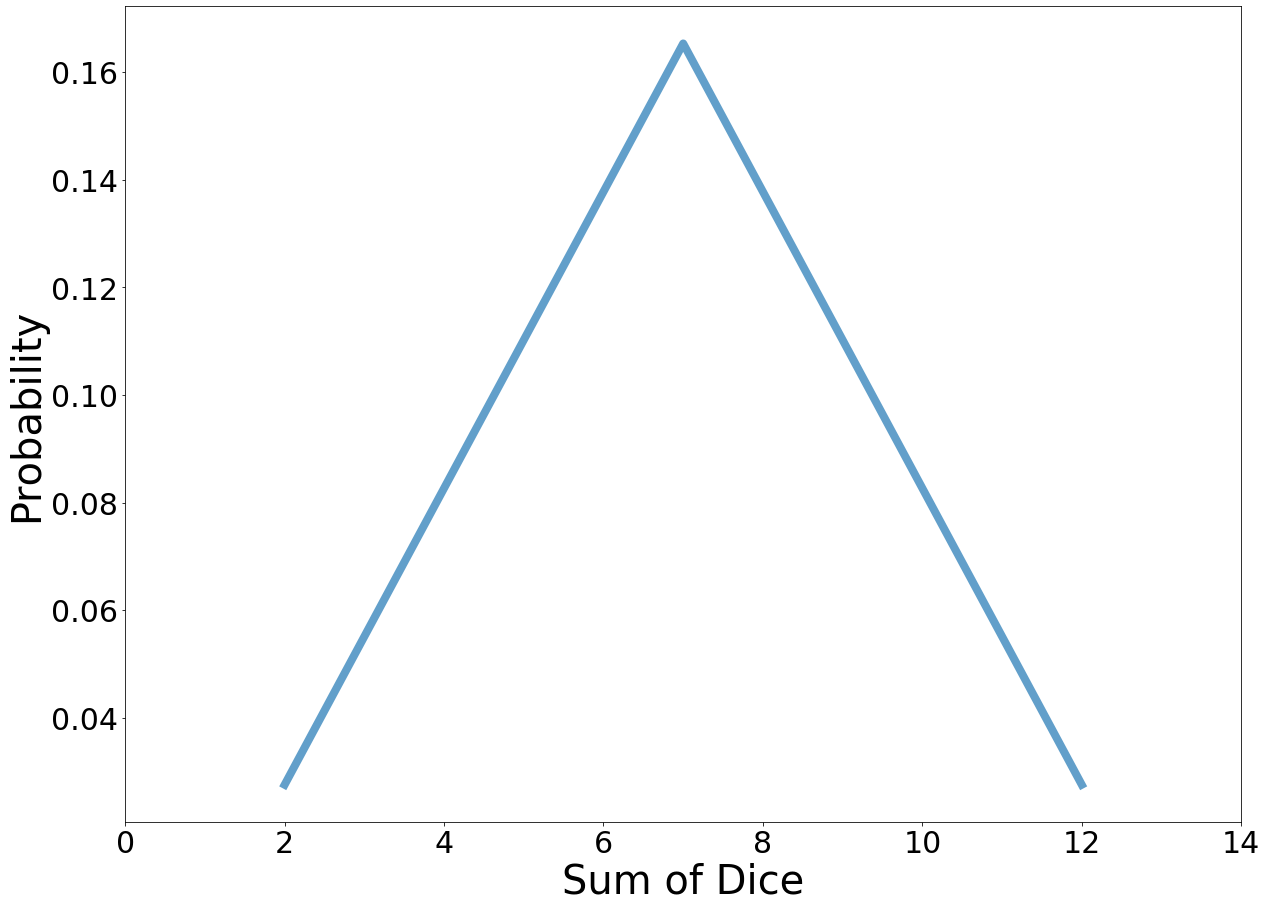

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

probs = [0.166, 0.166, 0.166, 0.166, 0.166, 0.166]
convolve = np.convolve(probs, probs)
print(convolve)
x = np.linspace(2,12,11)

print(x)
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 30)
plt.xlim([0,14])

ax.set_ylabel('Probability', fontsize=40)
ax.set_xlabel('Sum of Dice', fontsize=40)
ax.plot(x, convolve, linewidth = 8, alpha = 0.7)

## 3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

Definition of mean: $\mu = \sum_{i=1}^n x_i  p_i$  
Definition of variance: $Var(x) = (\sum_{i=1}^n p_i* x_i^2) - \mu^2$ 

In [4]:
x = np.array([1,2,3,4,5,6])
probs = np.array([1/6,1/6,1/6,1/6,1/6,1/6])

mean = sum(x*probs)
print(mean)

3.5


In [6]:
var = sum(probs*x**2) - mean**2
print(var)

2.916666666666666


## 4) Repeat 2, and graph the **average** of 10 dice. Is this is a Gaussian distribution? Explain in depth.

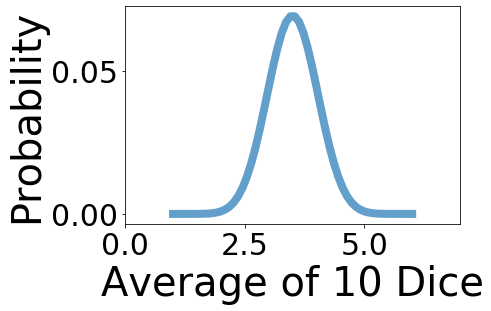

In [5]:
probs = [1/6,1/6,1/6,1/6,1/6,1/6]
result = probs

for index in range(10):
    result = np.convolve(probs, result)
    
x = np.linspace(1,6,result.size)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 30)
plt.xlim([0,7])

ax.set_ylabel('Probability', fontsize=40)
ax.set_xlabel('Average of 10 Dice', fontsize=40)
ax.plot(x, result, linewidth = 8, alpha = 0.7)

This certainly appears to be approximately a Gaussian distribution.  The Central limit theorem tells us that convolving a distribution with itself many times will cause the result to approach a Gaussian curve.  Had we dont more than 10 dice, the result would approach Gaussian even more.

## 5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

Averaged  1  times
mean:  -9.238165787905928e-13
variance:  103.88941537942038

Averaged  2  times
mean:  -2.750022431996513e-13
variance:  73.49459337024464

Averaged  3  times
mean:  1.8821055824957966e-13
variance:  60.03557387292051

Averaged  4  times
mean:  -1.1746159600534156e-13
variance:  52.01612796092705

Averaged  5  times
mean:  2.992051051364797e-14
variance:  46.54591314740236

Averaged  6  times
mean:  -4.578282197797989e-14
variance:  42.50982246309881

Averaged  7  times
mean:  -2.1987967002701225e-13
variance:  39.37441140875731

Averaged  8  times
mean:  -1.3829215550487106e-14
variance:  36.84818482289869

Averaged  9  times
mean:  4.5900783174346316e-14
variance:  34.75662955047006

Averaged  10  times
mean:  -3.411854132551184e-14
variance:  32.98804262276702



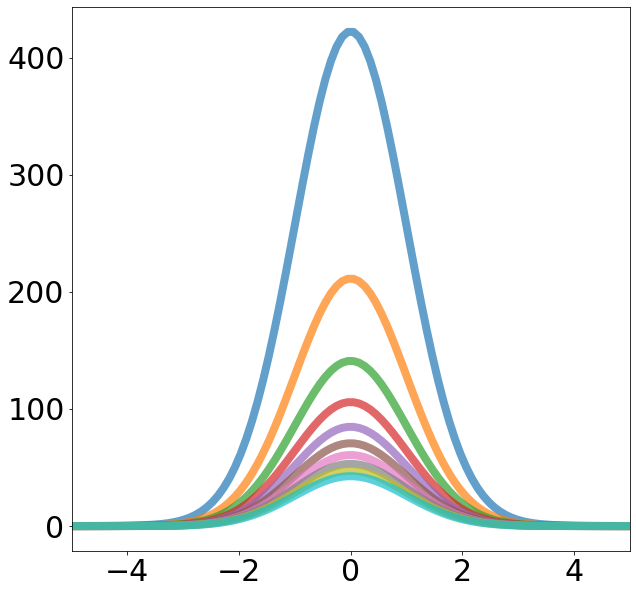

In [19]:
x = np.linspace(-5,5,100)
fig, ax = plt.subplots(1,1)#.subplots(10, 1)
plt.xlim([-5,5])
plt.tick_params(labelsize = 30)
fig.set_size_inches(10,10)

distribution = stats.norm.pdf(x, loc=0, scale=1)
results = distro
for index in range(10) :
    trials = index + 1
    average = results / trials

    x = np.linspace(-5,5,average.size)
    mean = sum(x*average)
    print("Averaged ", trials, " times")
    print("mean: ", mean)
    var = (sum(average*x**2) - mean**2)**0.5
    print("variance: ", var)
    print()
    ax.plot(x, average, linewidth = 8, alpha = 0.7)
    results += distribution 
    
plt.show()

With each subsequent trial, the variance shrinks.  This gives empiracal evidence to support the intuition that taking more trials yields more precise results.